<a href="https://colab.research.google.com/github/NguyenGiaDatt20104004/Nguyen-Gia-Dat-20104004/blob/main/AI_(270922).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=cb97208e19e9818dc0cb8b8d19ecc44e22ff16e4d9b94a4aa584efc0def6cba9
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


4.679528977617313


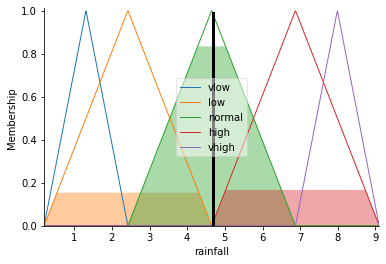

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

"""Đầu vào"""
temp = ctrl.Antecedent(np.arange(20.4, 41.2, 0.01), "temperature")
wind = ctrl.Antecedent(np.arange(0.7, 3.1, 0.01), "windspeed")
"""Đầu ra"""
rainfall = ctrl.Consequent(np.arange(0.2, 9.1, 0.01), "rainfall")

temp["vlow"] = fuzz.trimf(temp.universe, [20.4, 20.4, 25.6])
temp["low"] = fuzz.trimf(temp.universe, [20.4, 25.6, 30.8])
temp["normal"] = fuzz.trimf(temp.universe, [25.6, 30.8, 36])
temp["high"] = fuzz.trimf(temp.universe, [30.8, 36, 41.2])
temp["vhigh"] = fuzz.trimf(temp.universe, [36, 41.2, 41.2])

wind["vlow"] = fuzz.trimf(wind.universe, [0.7, 0.7, 1.3])
wind["low"] = fuzz.trimf(wind.universe, [0.7, 1.3, 1.9])
wind["normal"] = fuzz.trimf(wind.universe, [1.3, 1.9, 2.5])
wind["high"] = fuzz.trimf(wind.universe, [1.9, 2.5, 3.1])
wind["vhigh"] = fuzz.trimf(wind.universe, [2.5, 3.1, 3.1])

rainfall["vlow"] = fuzz.trimf(rainfall.universe, [0.2, 1.3125, 2.425])
rainfall["low"] = fuzz.trimf(rainfall.universe, [0.2, 2.425, 4.65])
rainfall["normal"] = fuzz.trimf(rainfall.universe, [2.425, 4.65, 6.875])
rainfall["high"] = fuzz.trimf(rainfall.universe, [4.65, 6.875, 9.1])
rainfall["vhigh"] = fuzz.trimf(rainfall.universe, [6.875, 7.9875, 9.1])

rule1 = ctrl.Rule(temp["vlow"] & wind["vlow"], rainfall["vlow"])
rule2 = ctrl.Rule(temp["low"] & wind["vlow"], rainfall["vlow"])
rule3 = ctrl.Rule(temp["vlow"] & wind["low"], rainfall["vlow"])
rule4 = ctrl.Rule(temp["low"] & wind["low"], rainfall["vlow"])

rule5 = ctrl.Rule(temp["normal"] & wind["vlow"], rainfall["low"])
rule6 = ctrl.Rule(temp["high"] & wind["vlow"], rainfall["low"])
rule7 = ctrl.Rule(temp["normal"] & wind["low"], rainfall["low"])
rule8 = ctrl.Rule(temp["vlow"] & wind["normal"], rainfall["low"])
rule9 = ctrl.Rule(temp["low"] & wind["normal"], rainfall["low"])
rule10 = ctrl.Rule(temp["vlow"] & wind["high"], rainfall["low"])

rule11 = ctrl.Rule(temp["vhigh"] & wind["vlow"], rainfall["normal"])
rule12 = ctrl.Rule(temp["high"] & wind["low"], rainfall["normal"])
rule13 = ctrl.Rule(temp["normal"] & wind["normal"], rainfall["normal"])
rule14 = ctrl.Rule(temp["low"] & wind["high"], rainfall["normal"])
rule15 = ctrl.Rule(temp["vlow"] & wind["vhigh"], rainfall["normal"])

rule16 = ctrl.Rule(temp["vhigh"] & wind["low"], rainfall["high"])
rule17 = ctrl.Rule(temp["high"] & wind["normal"], rainfall["high"])
rule18 = ctrl.Rule(temp["vhigh"] & wind["normal"], rainfall["high"])
rule19 = ctrl.Rule(temp["normal"] & wind["high"], rainfall["high"])
rule20 = ctrl.Rule(temp["low"] & wind["vhigh"], rainfall["high"])
rule21 = ctrl.Rule(temp["normal"] & wind["vhigh"], rainfall["high"])

rule22 = ctrl.Rule(temp["high"] & wind["high"], rainfall["vhigh"])
rule23 = ctrl.Rule(temp["vhigh"] & wind["high"], rainfall["vhigh"])
rule24 = ctrl.Rule(temp["high"] & wind["vhigh"], rainfall["vhigh"])
rule25 = ctrl.Rule(temp["vhigh"] & wind["vhigh"], rainfall["vhigh"])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,
                                   rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, 
                                   rule22, rule23, rule24, rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input["temperature"] = 30
tipping.input["windspeed"] = 2
tipping.compute()
print(tipping.output["rainfall"])
rainfall.view(sim = tipping)

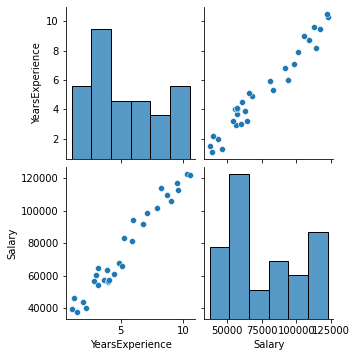

In [ ]:
#Regression (hồi quy)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Salary_Data.csv")
data.head()
data.shape

x = data.drop(["Salary"], axis = True)
y= data["Salary"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

sns.pairplot(data)

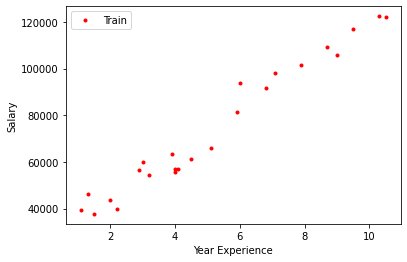

In [ ]:
plt.plot(X_train, Y_train, "r.", label = "Train")
plt.xlabel("Year Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test).round(1)
cal = pd.DataFrame(np.c_[Y_test, y_pred], columns = ["Original Salary", "Predicted Salary"])
#cal
print("Coeffcient", model.coef_)
print("Intercept", model.intercept_)
print("Accuracy", model.score(X_train, Y_train))

Coeffcient [9423.81532303]
Intercept 25321.583011776813
Acenracy 0.9645401573418146


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test).round(1)
cal = pd.DataFrame(np.c_[Y_test, y_pred], columns = ["Original Salary", "Predicted Salary"])
#cal
print("Coeffcient", model.coef_)
print("Intercept", model.intercept_)
print("Accuracy", model.score(X_test, Y_test))

Coeffcient [9423.81532303]
Intercept 25321.583011776813
Accuracy 0.9024461774180497


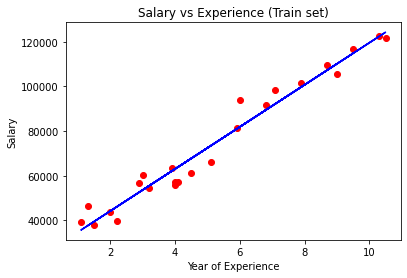

In [ ]:
plt.scatter(X_train, Y_train, color="red")
plt.plot(X_train, model.predict(X_train), color="blue")
plt.title("Salary vs Experience (Train set)")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()